In [1]:
import pandas as pd

# Load the dataset from the uploaded file
df = pd.read_csv('/content/survey.csv')

# --- Initial Exploration ---

# Print the first 5 rows to see what the data looks like
print("--- First 5 Rows ---")
print(df.head())

# Get a summary of all columns, their data types, and non-null counts
print("\n--- Dataset Info ---")
df.info()

--- First 5 Rows ---
             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No         

In [2]:
import pandas as pd

# It's good practice to reload the data to ensure we start fresh

# --- 1. Drop Irrelevant Columns ---
# We're dropping 'Timestamp', 'comments', and 'state'
df_cleaned = df.drop(columns=['Timestamp', 'comments', 'state'])
print("--- Columns after dropping Timestamp, comments, and state ---")
print(df_cleaned.columns)
print(f"\nOriginal number of columns: {len(df.columns)}")
print(f"Number of columns after dropping: {len(df_cleaned.columns)}\n")


# --- 2. Inspect Gender and Age columns ---
# Let's see all the unique values in the 'Gender' column to understand the mess
print("--- Unique values in 'Gender' column ---")
print(df_cleaned['Gender'].unique())

# Let's get a statistical summary of the 'Age' column to spot outliers
print("\n--- Statistical summary of 'Age' column ---")
print(df_cleaned['Age'].describe())

--- Columns after dropping Timestamp, comments, and state ---
Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

Original number of columns: 27
Number of columns after dropping: 24

--- Unique values in 'Gender' column ---
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Ma

In [3]:
# We'll continue working with the df_cleaned DataFrame from the previous step.
# Make sure you have run the code from Step 2 before this.

# --- 1. Clean the 'Age' column ---
# We will only keep rows where the age is between 18 and 75
df_cleaned = df_cleaned[(df_cleaned['Age'] >= 18) & (df_cleaned['Age'] <= 75)]


# --- 2. Clean and standardize the 'Gender' column ---
# Define a list of male and female identifiers
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man", "msle", "mail", "malr", "cis man", "cis male"]
female_str = ["female", "f", "woman", "femake", "female ", "cis-female/femme", "female (cis)", "femail"]

# Standardize the 'Gender' column based on the lists above
df_cleaned['Gender'] = df_cleaned['Gender'].str.lower()
df_cleaned['Gender'] = df_cleaned['Gender'].apply(lambda x: 'Male' if x in male_str else ('Female' if x in female_str else 'Other'))


# --- Verification ---
# Let's see the results of our cleaning.

print("--- Statistical summary of 'Age' column after cleaning ---")
print(df_cleaned['Age'].describe())

print("\n--- Unique values in 'Gender' column after cleaning ---")
print(df_cleaned['Gender'].value_counts())

--- Statistical summary of 'Age' column after cleaning ---
count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

--- Unique values in 'Gender' column after cleaning ---
Gender
Male      986
Female    246
Other      19
Name: count, dtype: int64


/tmp/ipython-input-3-3155379846.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Gender'] = df_cleaned['Gender'].str.lower()
/tmp/ipython-input-3-3155379846.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Gender'] = df_cleaned['Gender'].apply(lambda x: 'Male' if x in male_str else ('Female' if x in female_str else 'Other'))


In [4]:
# --- 1. Check for remaining missing values ---
print("--- Remaining missing values in each column ---")
print(df_cleaned.isnull().sum())


# --- 2. Inspect the columns that have missing values ---
# We want to see the existing categories in these columns to decide how to fill the gaps.

print("\n--- Value counts for 'self_employed' ---")
# use dropna=False to see the count of NaN values as well
print(df_cleaned['self_employed'].value_counts(dropna=False))

print("\n--- Value counts for 'work_interfere' ---")
print(df_cleaned['work_interfere'].value_counts(dropna=False))

--- Remaining missing values in each column ---
Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               262
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

--- Value counts for 'self_employed' ---
self_employed
No     1091
Yes     142
NaN      18
Name: count, dtype: int64

--- Value counts for 'work_i

In [5]:
# --- Fill missing values using the mode ---

# For 'self_employed', we will fill NaN with 'No'
self_employed_mode = df_cleaned['self_employed'].mode()[0]
df_cleaned['self_employed'].fillna(self_employed_mode, inplace=True)

# For 'work_interfere', we will fill NaN with 'Sometimes'
work_interfere_mode = df_cleaned['work_interfere'].mode()[0]
df_cleaned['work_interfere'].fillna(work_interfere_mode, inplace=True)


# --- Verification ---
print("--- Missing values after filling ---")
print(df_cleaned.isnull().sum())

--- Missing values after filling ---
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


/tmp/ipython-input-5-3790040193.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['self_employed'].fillna(self_employed_mode, inplace=True)
/tmp/ipython-input-5-3790040193.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [6]:
from sklearn.preprocessing import LabelEncoder

# We'll apply Label Encoding to all the object (text) type columns
for column in df_cleaned.columns:
    if df_cleaned[column].dtype == 'object':
        le = LabelEncoder()
        df_cleaned[column] = le.fit_transform(df_cleaned[column])

# --- Verification ---
# Let's see what our data looks like now. All columns should be numbers.
print("--- First 5 rows of the fully numerical dataset ---")
print(df_cleaned.head())

print("\n--- New dataset info ---")
# The 'Dtype' for every column should now be a number (int64 or int32)
df_cleaned.info()

--- First 5 rows of the fully numerical dataset ---
   Age  Gender  Country  self_employed  family_history  treatment  \
0   37       0       44              0               0          1   
1   44       1       44              0               0          0   
2   32       1        6              0               0          0   
3   31       1       43              0               1          1   
4   31       1       44              0               0          0   

   work_interfere  no_employees  remote_work  tech_company  ...  anonymity  \
0               1             4            0             1  ...          2   
1               2             5            0             0  ...          0   
2               2             4            0             1  ...          0   
3               1             2            0             1  ...          1   
4               0             1            1             1  ...          0   

   leave  mental_health_consequence  phys_health_consequence  co

In [7]:
from sklearn.model_selection import train_test_split

# --- Define Features (X) and Target (y) ---

# X contains all the columns that we will use to make a prediction.
# We drop 'treatment' because that is what we are trying to predict.
X = df_cleaned.drop(columns=['treatment'])

# y is the target variable, the column we want to predict.
y = df_cleaned['treatment']


# --- Split the data ---
# test_size=0.2 means 20% of the data will be used for testing.
# random_state=42 ensures that we get the same split every time we run the code,
# which makes our results reproducible.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- Verification ---
print("--- Data Split Complete ---")
print(f"Shape of X_train (features for training): {X_train.shape}")
print(f"Shape of X_test (features for testing): {X_test.shape}")
print(f"Shape of y_train (target for training): {y_train.shape}")
print(f"Shape of y_test (target for testing): {y_test.shape}")

--- Data Split Complete ---
Shape of X_train (features for training): (1000, 23)
Shape of X_test (features for testing): (251, 23)
Shape of y_train (target for training): (1000,)
Shape of y_test (target for testing): (251,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# --- 1. Initialize and Train the Model ---

# Create an instance of the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000) # Increased max_iter for convergence

# Train the model using our training data (X_train, y_train)
log_reg.fit(X_train, y_train)


# --- 2. Make Predictions on the Test Data ---

# Use the trained model to make predictions on the unseen test data (X_test)
y_pred_lr = log_reg.predict(X_test)


# --- Verification ---
print("--- Logistic Regression Model Trained ---")
print("Predictions have been made on the test set.")
print("We will evaluate the performance in the next step.")

--- Logistic Regression Model Trained ---
Predictions have been made on the test set.
We will evaluate the performance in the next step.


--- Accuracy of the Logistic Regression Model ---
Accuracy: 0.71

--- Confusion Matrix ---


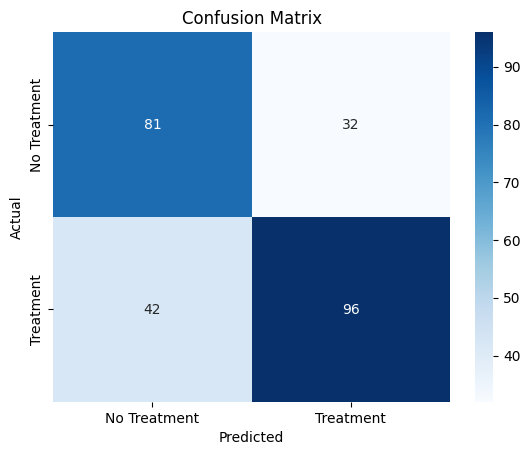


--- Classification Report ---
              precision    recall  f1-score   support

No Treatment       0.66      0.72      0.69       113
   Treatment       0.75      0.70      0.72       138

    accuracy                           0.71       251
   macro avg       0.70      0.71      0.70       251
weighted avg       0.71      0.71      0.71       251



In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Calculate Accuracy ---
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"--- Accuracy of the Logistic Regression Model ---")
print(f"Accuracy: {accuracy_lr:.2f}\n")


# --- 2. Display the Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred_lr)

print("--- Confusion Matrix ---")
# We use seaborn to make the confusion matrix look nice
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Treatment', 'Treatment'], yticklabels=['No Treatment', 'Treatment'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# --- 3. Display the Classification Report ---
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_lr, target_names=['No Treatment', 'Treatment']))

In [10]:
from sklearn.ensemble import RandomForestClassifier

# --- 1. Initialize and Train the Model ---

# Create an instance of the Random Forest model
# random_state=42 ensures the results are reproducible
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using our training data
rf_model.fit(X_train, y_train)


# --- 2. Make Predictions on the Test Data ---

# Use the trained model to make predictions on the test data
y_pred_rf = rf_model.predict(X_test)


# --- Verification ---
print("--- Random Forest Model Trained ---")
print("Predictions have been made on the test set.")
print("We will evaluate the performance in the next step.")

--- Random Forest Model Trained ---
Predictions have been made on the test set.
We will evaluate the performance in the next step.


--- Accuracy of the Random Forest Model ---
Accuracy: 0.73

--- Confusion Matrix (Random Forest) ---


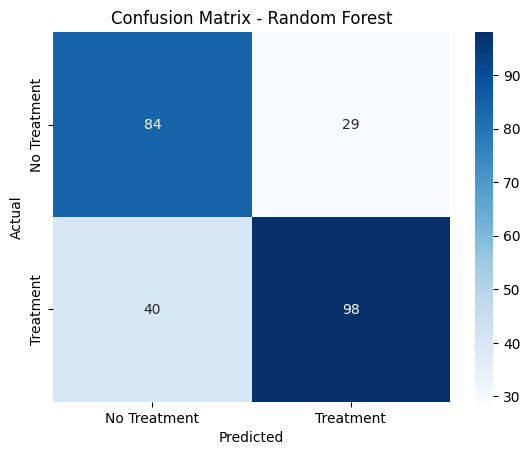


--- Classification Report (Random Forest) ---
              precision    recall  f1-score   support

No Treatment       0.68      0.74      0.71       113
   Treatment       0.77      0.71      0.74       138

    accuracy                           0.73       251
   macro avg       0.72      0.73      0.72       251
weighted avg       0.73      0.73      0.73       251



In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Calculate Accuracy ---
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"--- Accuracy of the Random Forest Model ---")
print(f"Accuracy: {accuracy_rf:.2f}\n")


# --- 2. Display the Confusion Matrix ---
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("--- Confusion Matrix (Random Forest) ---")
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Treatment', 'Treatment'], yticklabels=['No Treatment', 'Treatment'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.show()


# --- 3. Display the Classification Report ---
print("\n--- Classification Report (Random Forest) ---")
print(classification_report(y_test, y_pred_rf, target_names=['No Treatment', 'Treatment']))

--- Top 10 Most Important Features ---


/tmp/ipython-input-12-3915465255.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


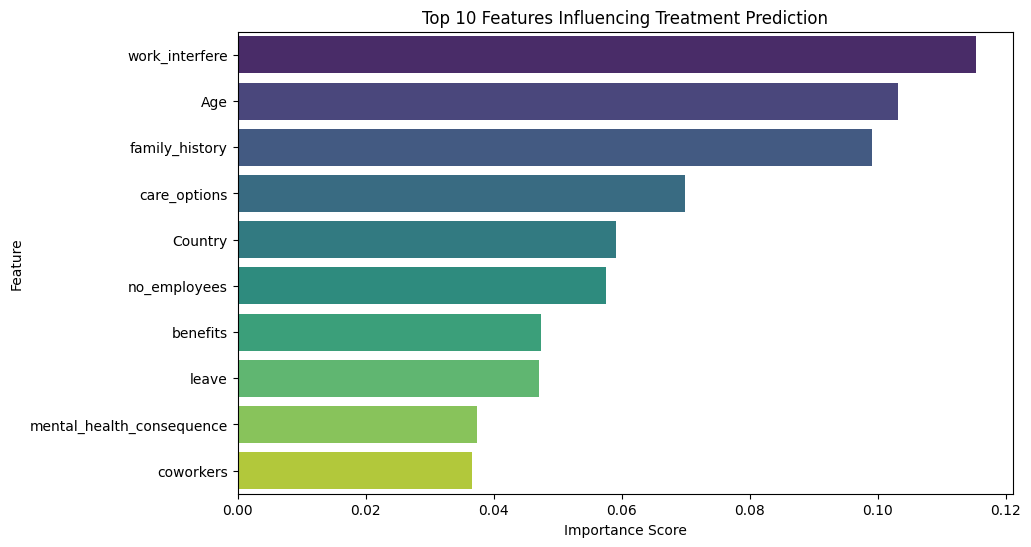

                      Feature  Importance
5              work_interfere    0.115304
0                         Age    0.103110
4              family_history    0.099156
10               care_options    0.069861
2                     Country    0.059071
6                no_employees    0.057516
9                    benefits    0.047398
14                      leave    0.047085
15  mental_health_consequence    0.037457
17                  coworkers    0.036617
18                 supervisor    0.036574
20      phys_health_interview    0.034929
21         mental_vs_physical    0.034489
12                  seek_help    0.032284
13                  anonymity    0.026314
11           wellness_program    0.025740
1                      Gender    0.025481
16    phys_health_consequence    0.024220
7                 remote_work    0.021938
22            obs_consequence    0.019982
19    mental_health_interview    0.017186
8                tech_company    0.016178
3               self_employed    0

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Get Feature Importances from the Random Forest Model ---
# The model stores the importance of each feature after being trained.
importances = rf_model.feature_importances_

# --- 2. Create a DataFrame for Visualization ---
# We'll match the importance scores with their corresponding feature names.
# X_train.columns contains the names of all our feature columns.
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


# --- 3. Visualize the Top 10 Features ---
print("--- Top 10 Most Important Features ---")

plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Features Influencing Treatment Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Display the full list as text
print(feature_importance_df)

In [13]:
!pip install xgboost

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:44:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- Accuracy of the XGBoost Model ---
Accuracy: 0.67

--- Confusion Matrix (XGBoost) ---


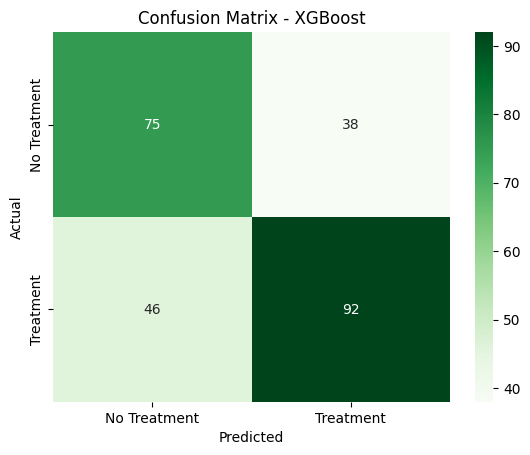


--- Classification Report (XGBoost) ---
              precision    recall  f1-score   support

No Treatment       0.62      0.66      0.64       113
   Treatment       0.71      0.67      0.69       138

    accuracy                           0.67       251
   macro avg       0.66      0.67      0.66       251
weighted avg       0.67      0.67      0.67       251



In [14]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Initialize and Train the XGBoost Model ---
# We create an instance of the XGBoost classifier.
# `use_label_encoder=False` and `eval_metric='logloss'` are set to use the latest standards.
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model on the same training data
xgb_model.fit(X_train, y_train)

# --- 2. Make Predictions ---
y_pred_xgb = xgb_model.predict(X_test)

# --- 3. Evaluate the Model ---

# Calculate Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"--- Accuracy of the XGBoost Model ---")
print(f"Accuracy: {accuracy_xgb:.2f}\n")

# Display the Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("--- Confusion Matrix (XGBoost) ---")
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=['No Treatment', 'Treatment'], yticklabels=['No Treatment', 'Treatment'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# Display the Classification Report
print("\n--- Classification Report (XGBoost) ---")
print(classification_report(y_test, y_pred_xgb, target_names=['No Treatment', 'Treatment']))

In [15]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# --- 1. Define the Parameter Grid ---
# These are the XGBoost settings we want to test.
param_grid = {
    'max_depth': [3, 4, 5],            # The maximum depth of a tree.
    'learning_rate': [0.1, 0.01, 0.05], # The step size shrinkage.
    'n_estimators': [100, 200, 300],    # The number of boosting rounds.
    'subsample': [0.8, 1.0]             # The fraction of observations to be randomly sampled for each tree.
}

# --- 2. Set up GridSearchCV ---
# We tell it which model to tune (XGBoost) and which parameters to test (param_grid).
# cv=5 means 5-fold cross-validation.
# n_jobs=-1 uses all available CPU cores to speed up the process.
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=1 # This will print progress updates
)

# --- 3. Run the Search ---
# This is the step that will take some time.
print("--- Starting Hyperparameter Tuning with GridSearchCV ---")
grid_search.fit(X_train, y_train)
print("--- Tuning Complete ---")

# --- 4. Get the Best Model and Evaluate It ---
print(f"\nBest Parameters Found: {grid_search.best_params_}")

# Get the best model found by the grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions with the new best model
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Calculate the new accuracy
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)

print(f"\n--- Accuracy of the Tuned XGBoost Model ---")
print(f"Accuracy: {accuracy_best_xgb:.2f}")

--- Starting Hyperparameter Tuning with GridSearchCV ---
Fitting 5 folds for each of 54 candidates, totalling 270 fits
--- Tuning Complete ---

Best Parameters Found: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}

--- Accuracy of the Tuned XGBoost Model ---
Accuracy: 0.72


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:50:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import xgboost as xgb

# --- 1. Reload the Cleaned DataFrame ---
# We'll use df_cleaned before it was numerically encoded to create our new features.
# Make sure you have the 'df_cleaned' DataFrame available from Step 5.
# For simplicity, let's just recreate it quickly.

# Load original data
df = pd.read_csv('survey.csv')
# Drop irrelevant columns
df_cleaned = df.drop(columns=['Timestamp', 'comments', 'state'])
# Clean Age
df_cleaned = df_cleaned[(df_cleaned['Age'] >= 18) & (df_cleaned['Age'] <= 75)]
# Clean Gender
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man", "msle", "mail", "malr", "cis man", "cis male"]
female_str = ["female", "f", "woman", "femake", "female ", "cis-female/femme", "female (cis)", "femail"]
df_cleaned['Gender'] = df_cleaned['Gender'].str.lower()
df_cleaned['Gender'] = df_cleaned['Gender'].apply(lambda x: 'Male' if x in male_str else ('Female' if x in female_str else 'Other'))
# Fill missing values
df_cleaned['self_employed'].fillna('No', inplace=True)
df_cleaned['work_interfere'].fillna('Sometimes', inplace=True)


# --- 2. Feature Engineering ---

# Create 'support_score'
# We check if the answer is 'Yes' for these supportive features.
df_cleaned['support_score'] = (
    (df_cleaned['benefits'] == 'Yes').astype(int) +
    (df_cleaned['care_options'] == 'Yes').astype(int) +
    (df_cleaned['wellness_program'] == 'Yes').astype(int) +
    (df_cleaned['seek_help'] == 'Yes').astype(int)
)

# Create 'age_group'
# We define the age bins and labels
bins = [17, 25, 35, 45, 75]
labels = ['18-25', '26-35', '36-45', '46-75']
df_cleaned['age_group'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=True)

# Now we drop the original 'Age' column since we have 'age_group'
df_cleaned.drop(columns=['Age'], inplace=True)


# --- 3. Re-run Preprocessing and Splitting ---

# Label Encode all object columns again, including our new 'age_group'
for column in df_cleaned.columns:
    if df_cleaned[column].dtype == 'object' or df_cleaned[column].dtype.name == 'category':
        le = LabelEncoder()
        df_cleaned[column] = le.fit_transform(df_cleaned[column])

# Define new features (X) and target (y)
X_new = df_cleaned.drop('treatment', axis=1)
y_new = df_cleaned['treatment']

# Split the data again
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# --- 4. Retrain the Best Model on New Features ---

# We'll use the best model we found from GridSearchCV
# The parameters were: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
final_model = xgb.XGBClassifier(
    learning_rate=0.01,
    max_depth=4,
    n_estimators=300,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

print("--- Training final model on new engineered features... ---")
final_model.fit(X_train_new, y_train_new)

# --- 5. Evaluate the Final Model ---
y_pred_final = final_model.predict(X_test_new)
accuracy_final = accuracy_score(y_test_new, y_pred_final)

print(f"\n--- Accuracy with Feature Engineering ---")
print(f"Final Model Accuracy: {accuracy_final:.2f}")

--- Training final model on new engineered features... ---

--- Accuracy with Feature Engineering ---
Final Model Accuracy: 0.73


/tmp/ipython-input-16-2277272027.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['self_employed'].fillna('No', inplace=True)
/tmp/ipython-input-16-2277272027.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [17]:
import joblib

# --- 1. Save the Final Trained Model ---
# This is the tuned XGBoost model trained on your engineered features.
joblib.dump(final_model, 'final_xgb_model.joblib')

# --- 2. Save the Columns List ---
# The model needs to know the exact order and names of the input columns.
# X_new is the DataFrame we used to train the final_model
model_columns = X_new.columns
joblib.dump(model_columns, 'model_columns.joblib')

print("--- Model and columns saved! ---")
print("Please download 'final_xgb_model.joblib' and 'model_columns.joblib' from the Colab file explorer.")

--- Model and columns saved! ---
Please download 'final_xgb_model.joblib' and 'model_columns.joblib' from the Colab file explorer.
